In [149]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_classif

In [150]:
df = pd.read_csv('/Users/bryanzhang/Desktop/career/projects/harmonic_horizons/data/tracks.csv')

In [151]:
df.dropna(axis=0, how='any', inplace=True)
removed_cols = ['Unnamed: 0', 'type', 'uri', 'track_href', 'analysis_url', 'id']
df = df.drop(columns=removed_cols)

song_counts = df['name'].value_counts()
duplicate_songs = song_counts[song_counts > 1].index

track_df = df[~df['name'].isin(duplicate_songs)]
track_df = track_df.set_index('name')

In [152]:
def adjust_time(time):
    return time/1000

track_df['duration_ms'] = track_df['duration_ms'].apply(adjust_time)
track_df = track_df.rename(columns={'duration_ms': 'duration_s'})

In [153]:
mood_distribution = track_df.groupby('mood').describe()
mood_distribution

danceability                                                     \
                 count      mean       std     min     25%    50%     75%   
mood                                                                        
chill           3007.0  0.526856  0.226786  0.0566  0.3845  0.582  0.7000   
dark            2019.0  0.414657  0.200757  0.0576  0.2520  0.404  0.5605   
energetic       1951.0  0.611131  0.203608  0.0610  0.5205  0.658  0.7540   
epic            2425.0  0.432082  0.192421  0.0000  0.2800  0.435  0.5720   
happy           1881.0  0.536919  0.197965  0.0615  0.4090  0.570  0.6910   
romantic        1061.0  0.606848  0.172179  0.0620  0.5180  0.637  0.7320   
sad             1259.0  0.518345  0.205279  0.0000  0.3815  0.551  0.6780   

                  energy            ... time_signature      popularity  \
             max   count      mean  ...            75%  max      count   
mood                                ...                                  
chill      0.971  3007.0  0.352010  ...            4.0  5.0     3007.0   
dark       0.960  2019.0  0.326363  ...            4.0  5.0     2019.0   
energetic  0.988  1951.0  0.684499  ...            4.0  5.0     1951.0   
epic       0.964  2425.0  0.485438  ...            4.0  5.0     2425.0   
happy      0.968  1881.0  0.487406  ...            4.0  5.0     1881.0   
romantic   0.947  1061.0  0.540329  ...            4.0  5.0     1061.0   
sad        0.926  1259.0  0.424231  ...            4.0  5.0     1259.0   

                                                               
                mean        std  min   25%   50%   75%    max  
mood                                                           
chill      48.053874  17.704562  0.0  40.0  51.0  61.0   88.0  
dark       36.345716  21.493594  0.0  21.0  35.0  52.0   87.0  
energetic  55.306509  21.698691  0.0  44.0  59.0  72.0   96.0  
epic       42.041649  22.595368  0.0  27.0  42.0  60.0   88.0  
happy      44.335991  23.612425  0.0  29.0  45.0  63.0  100.0  
romantic   53.467484  21.700364  0.0  42.0  60.0  69.0   91.0  
sad        43.508340  24.550598  0.0  30.0  47.0  63.0   89.0  

[7 rows x 112 columns]

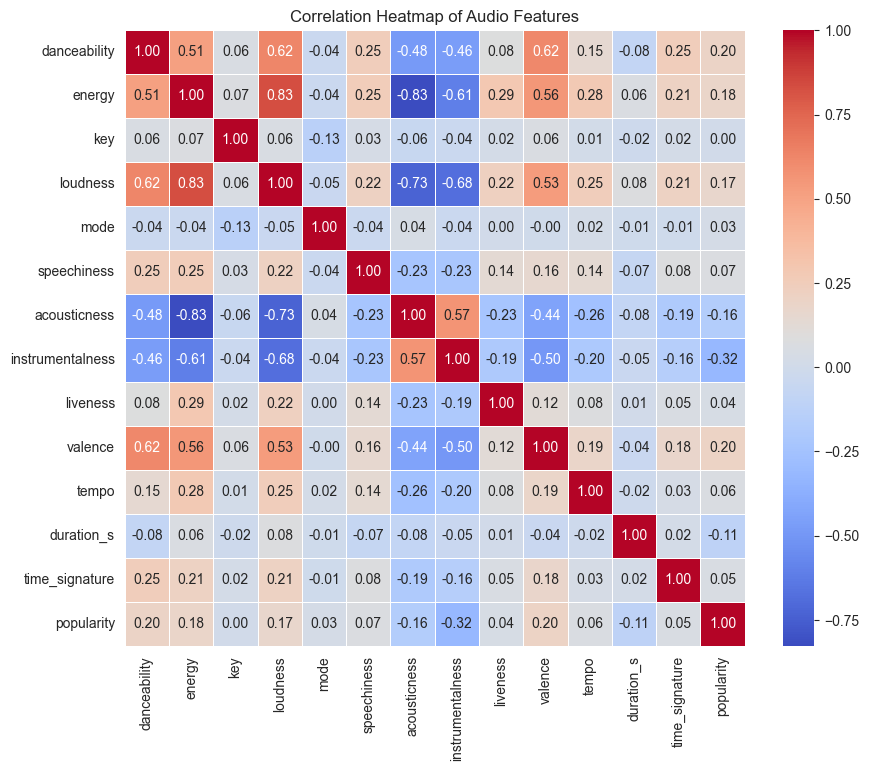

In [154]:
corr_matrix = track_df.drop(columns=['mood']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Audio Features')
plt.show()

In [155]:
X = track_df.drop(columns=['mood'])
y = track_df['mood']

F_values, P_values = f_classif(X, y)
anova_results = pd.DataFrame({'Feature': X.columns, 'F-Value': F_values, 'P-Value': P_values})

anova_results.sort_values(by='P-Value', ascending=False)

,Feature,F-Value,P-Value
2,key,5.283741,1.887273e-05
12,time_signature,26.520209,1.410118e-31
10,tempo,30.211700,3.232960e-36
8,liveness,36.748214,1.919654e-44
4,mode,49.463884,1.891096e-60
11,duration_s,64.134295,7.062904e-79
5,speechiness,105.649793,1.341010e-130
13,popularity,171.430291,5.644663e-211
9,valence,197.796024,1.265785e-242
0,danceability,261.733367,4.841829e-318


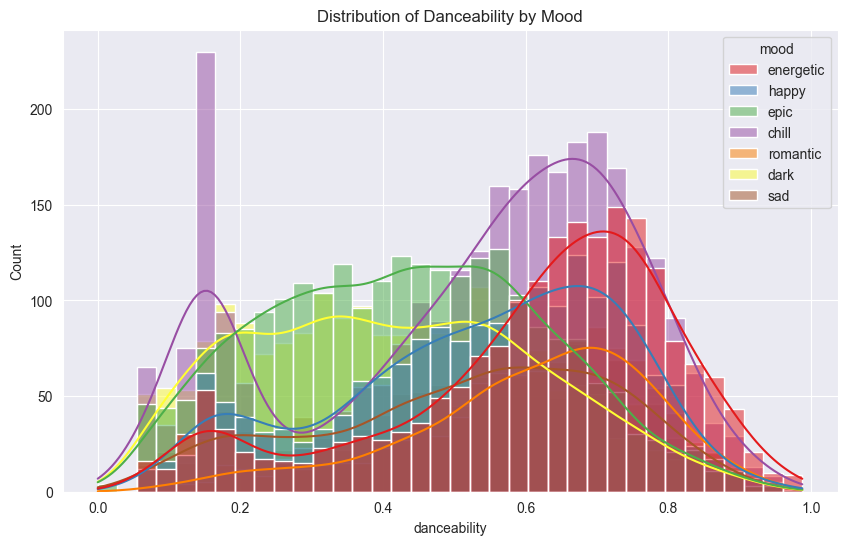

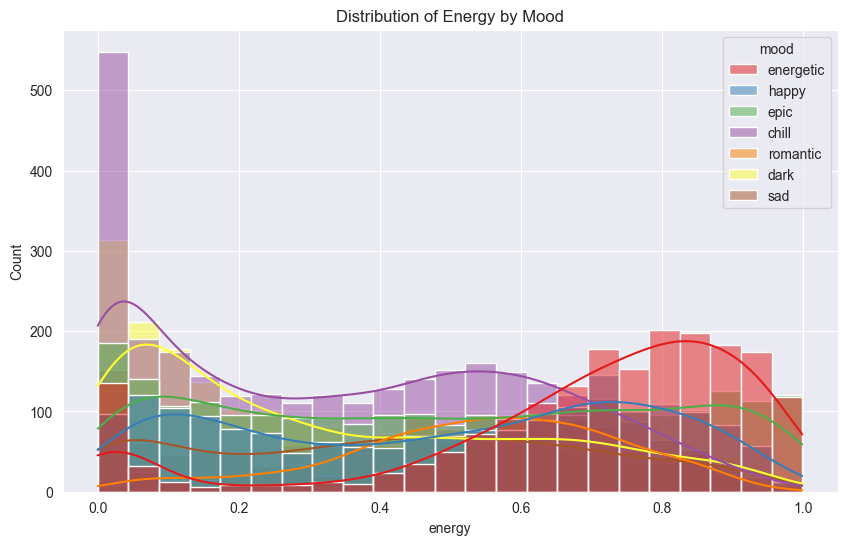

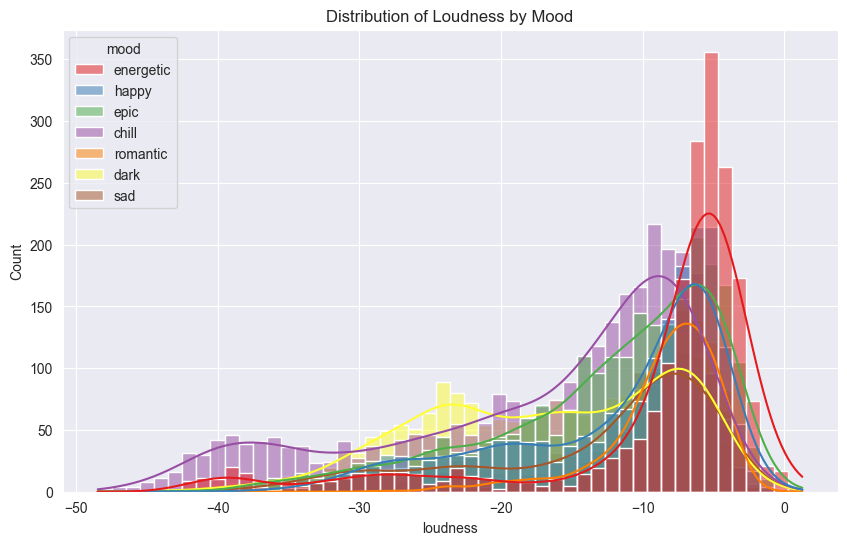

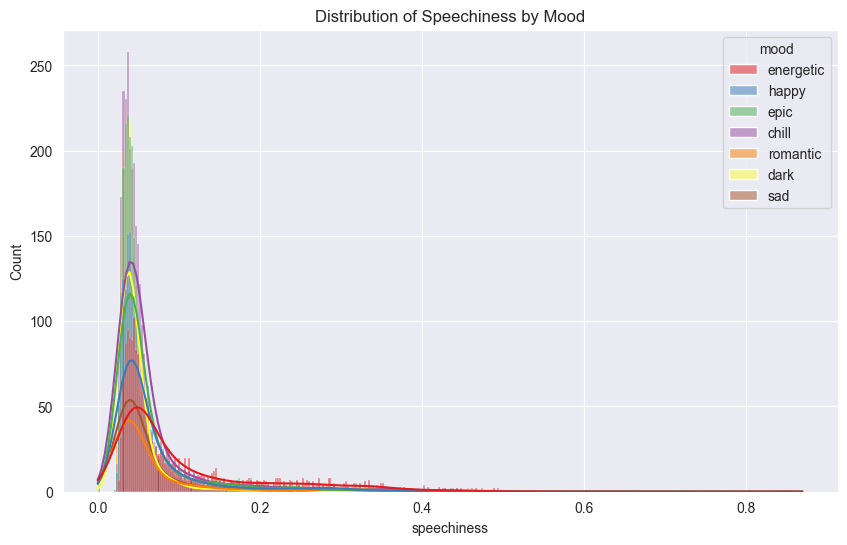

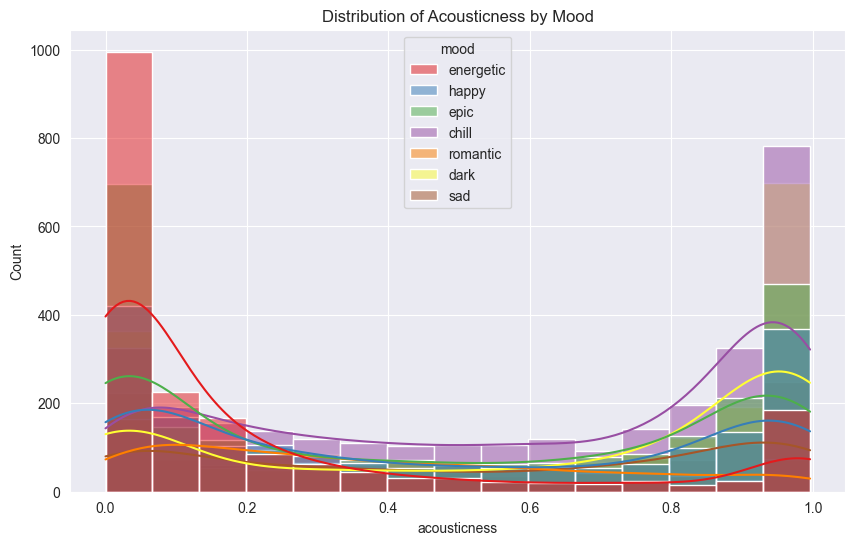

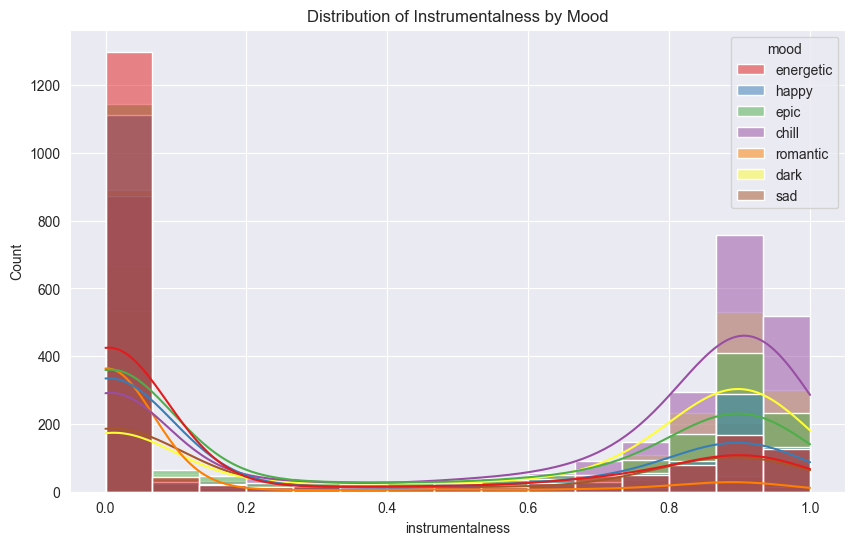

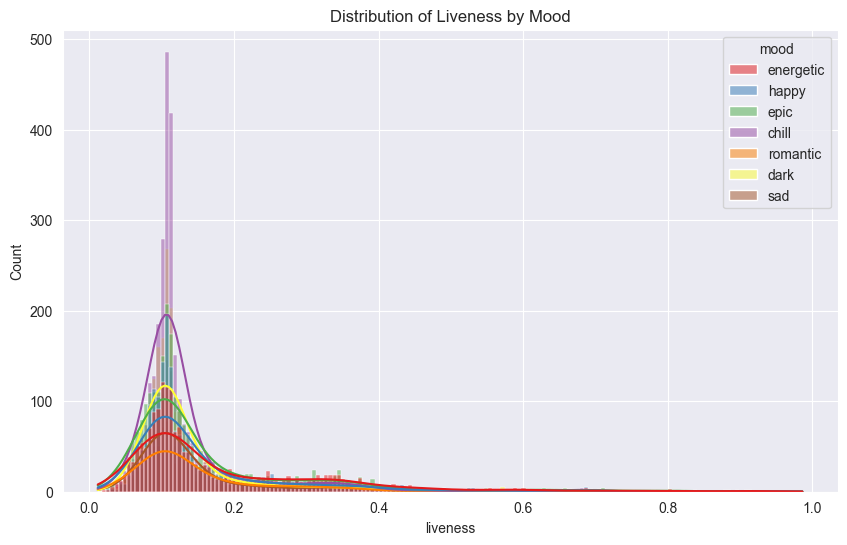

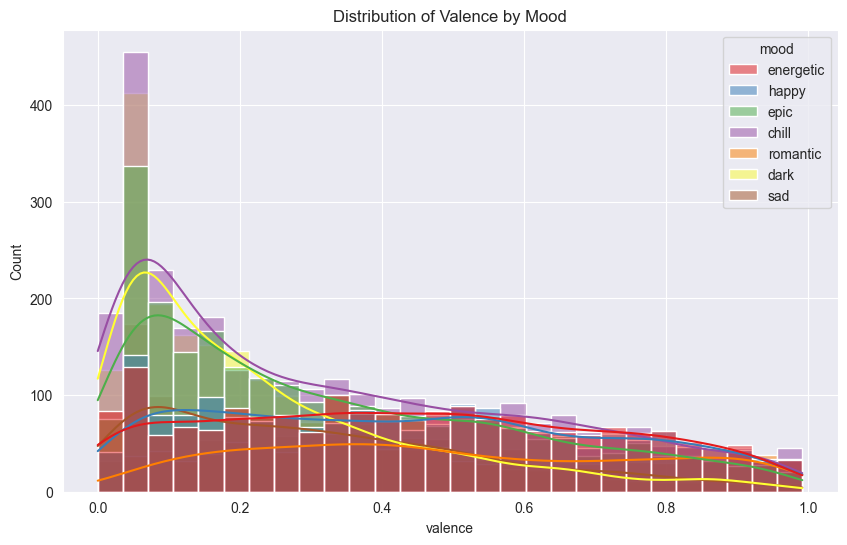

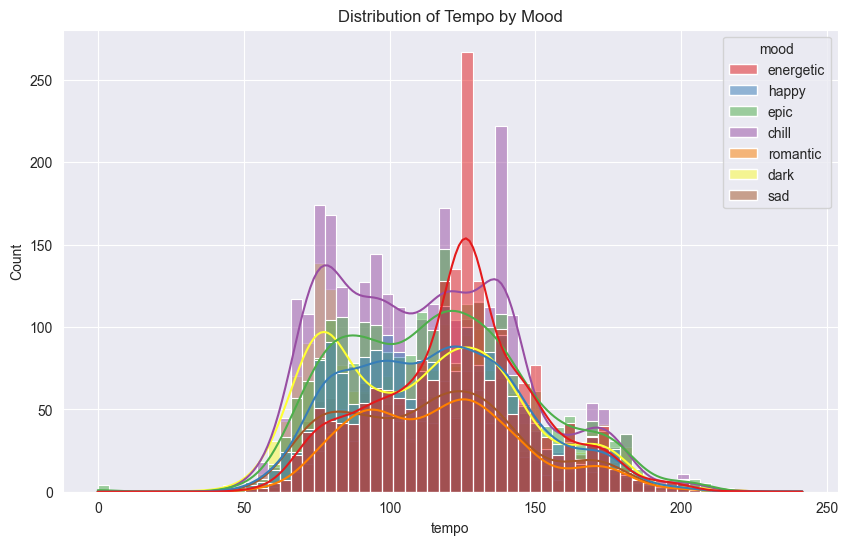

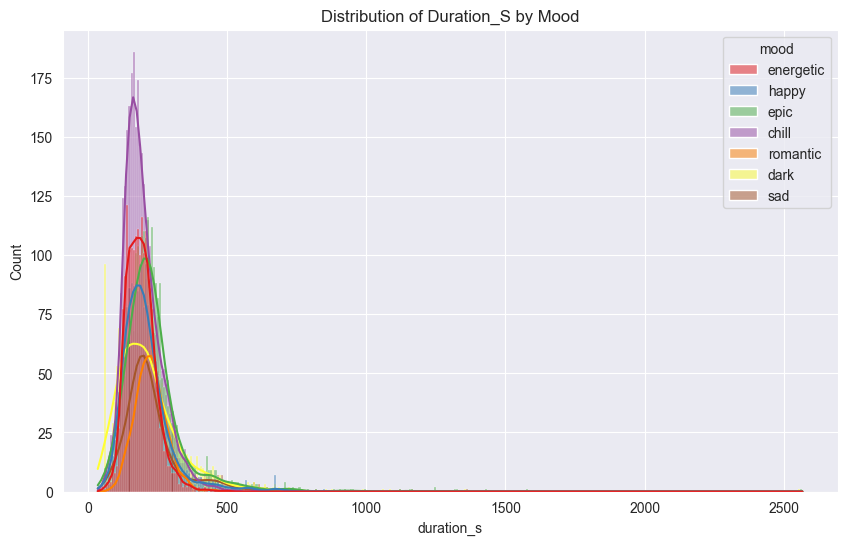

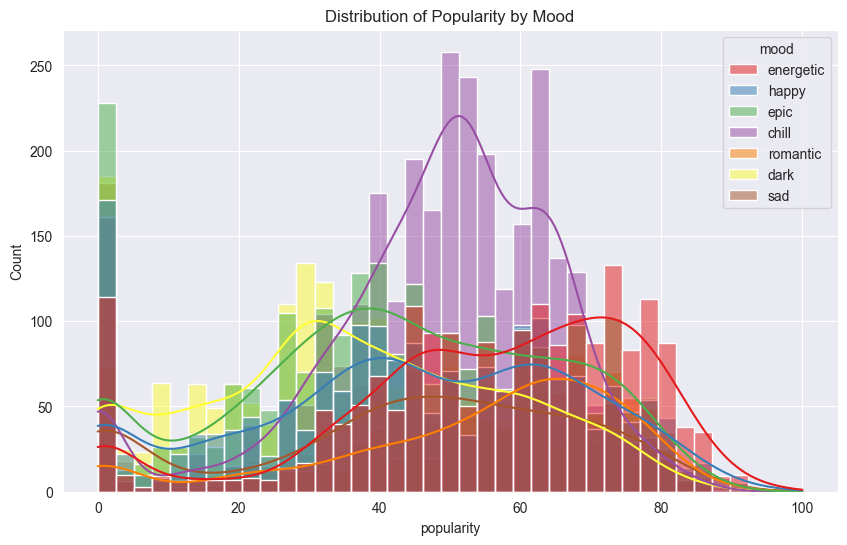

In [156]:
def create_visualization(df, vis_type, **kwargs):
    audio_features = df.drop(columns=['mood', 'key', 'time_signature', 'mode']).columns
    
    for feature in audio_features:
        plt.figure(figsize=(10, 6))
        vis_type(data=df, x=feature, **kwargs)
        
        plt.title(f'Distribution of {feature.title()} by Mood')
        plt.xlabel(f'{feature}')
        
        if vis_type == sns.histplot:
            plt.ylabel('Count')
        else:
            plt.ylabel('Value')
            plt.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=False)
        
        plt.show()

create_visualization(track_df, sns.histplot, hue='mood', palette='Set1', kde=True)

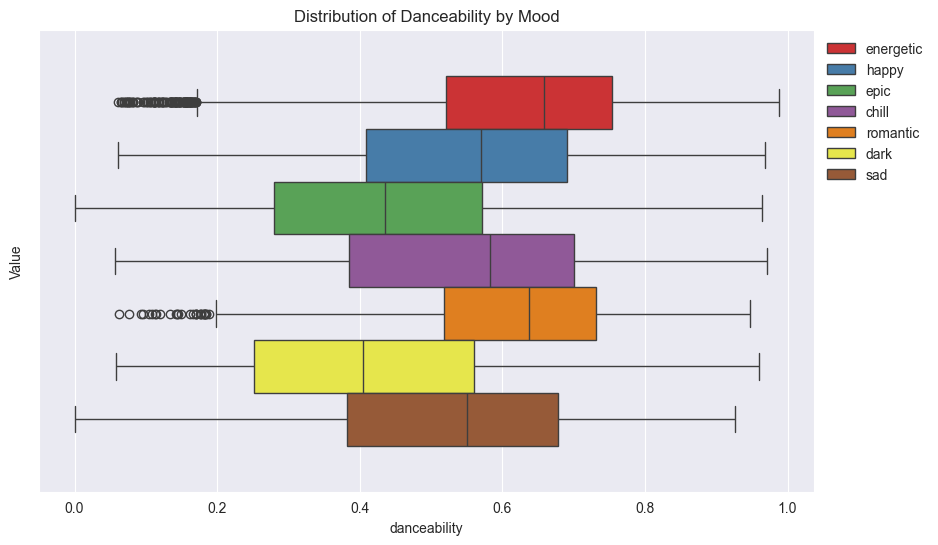

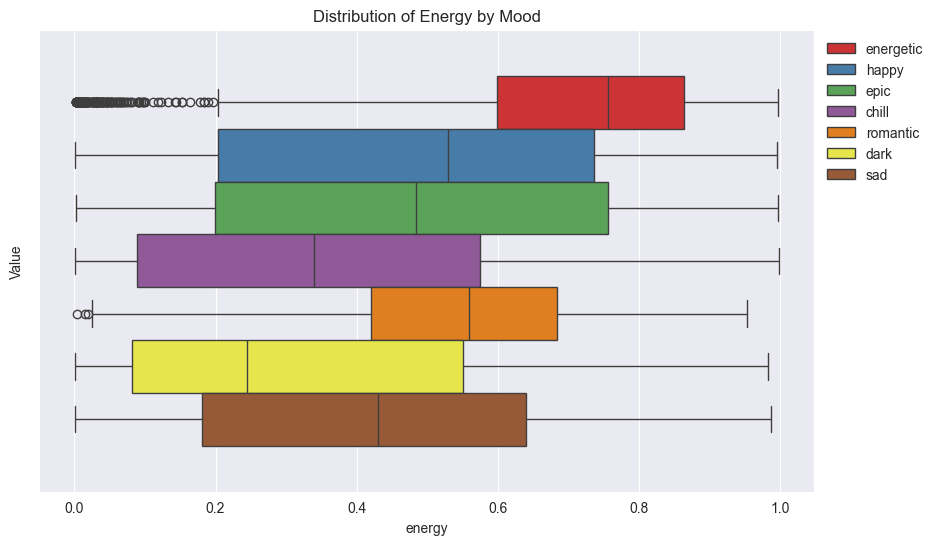

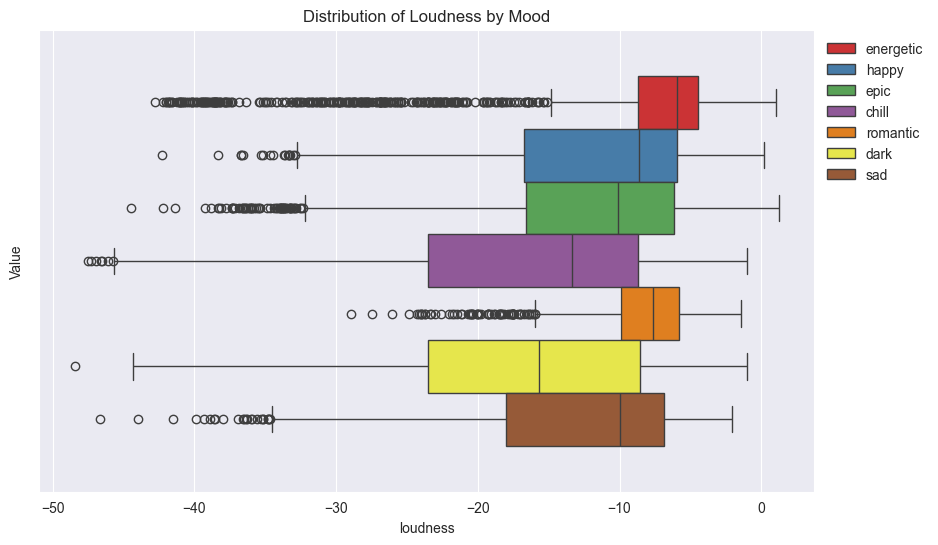

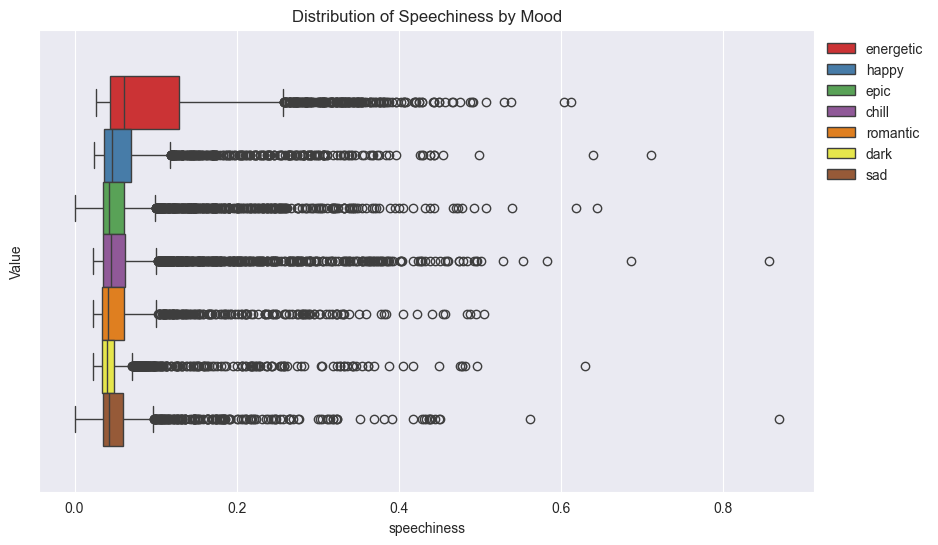

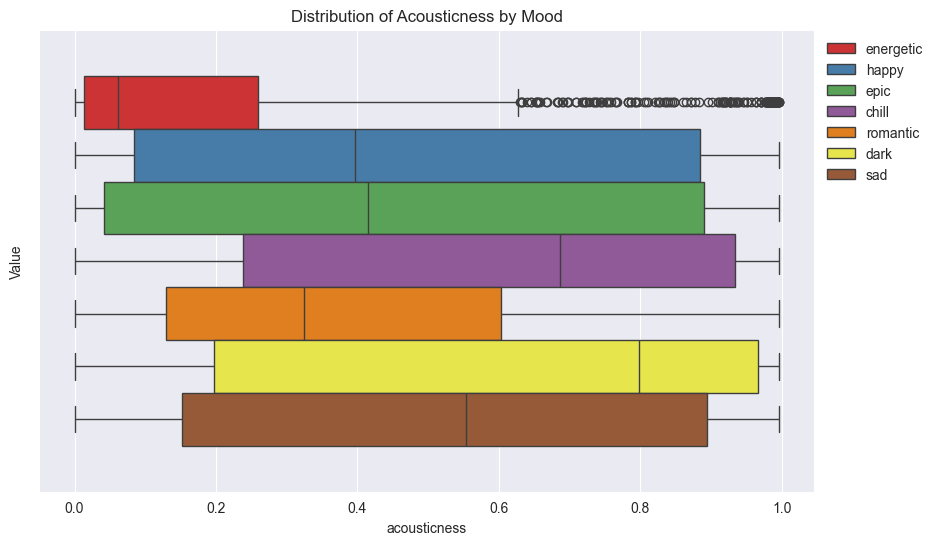

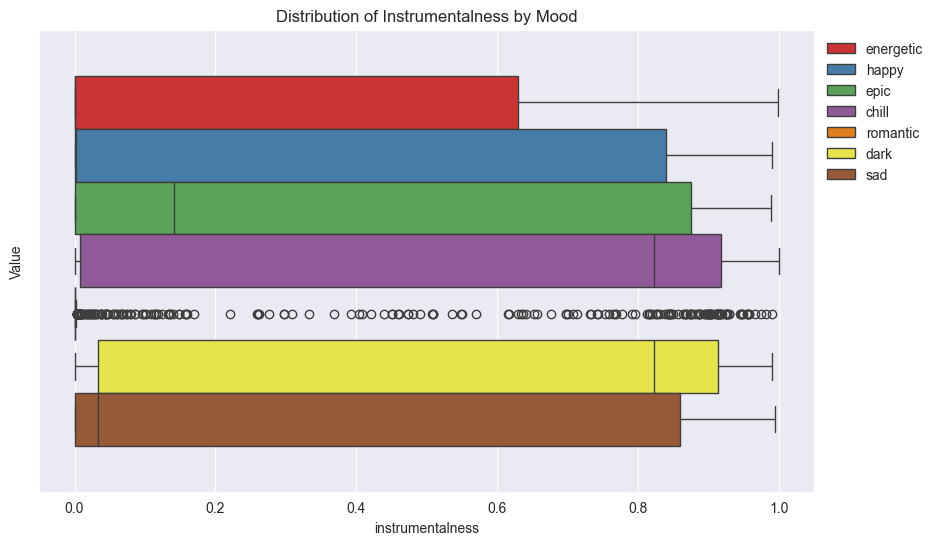

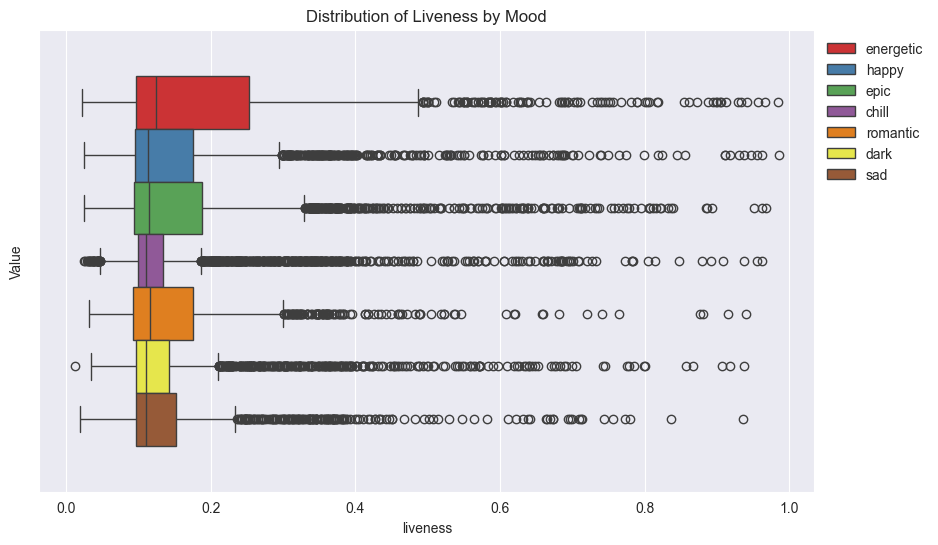

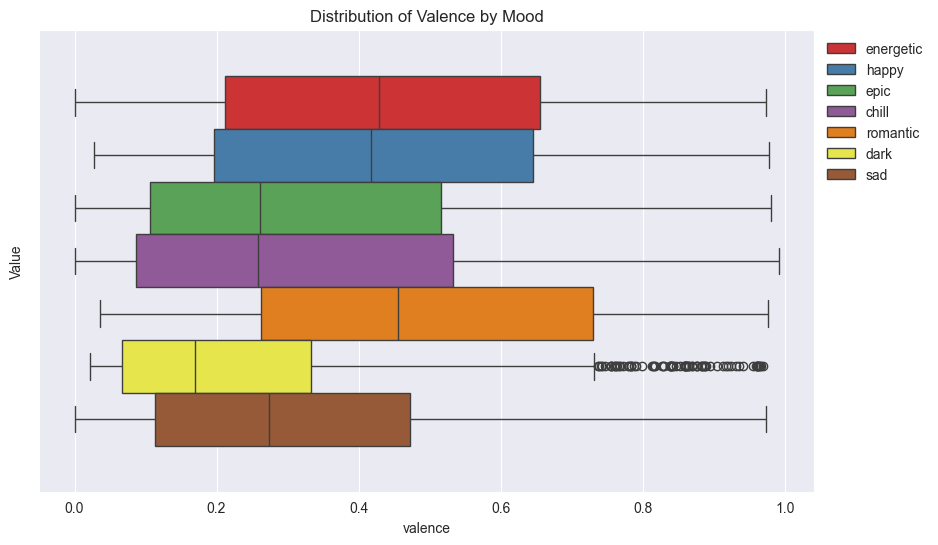

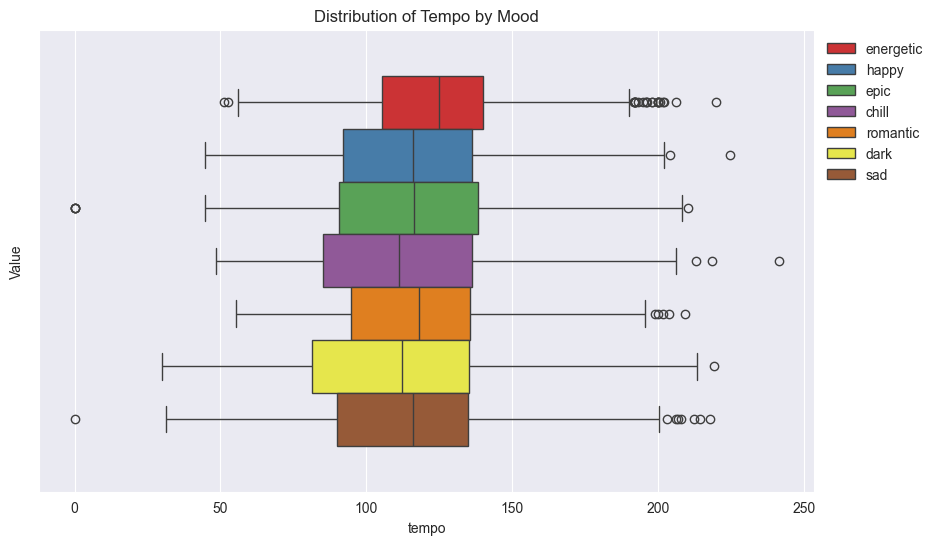

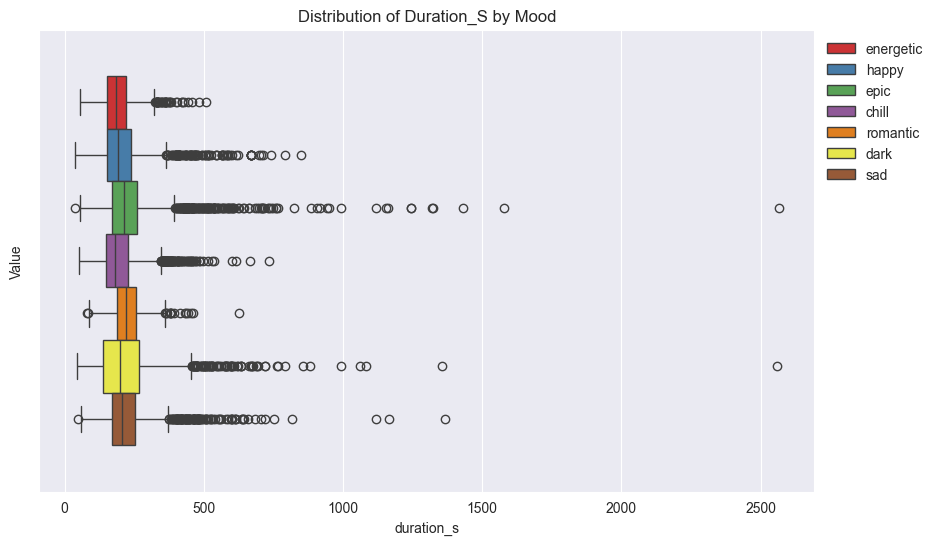

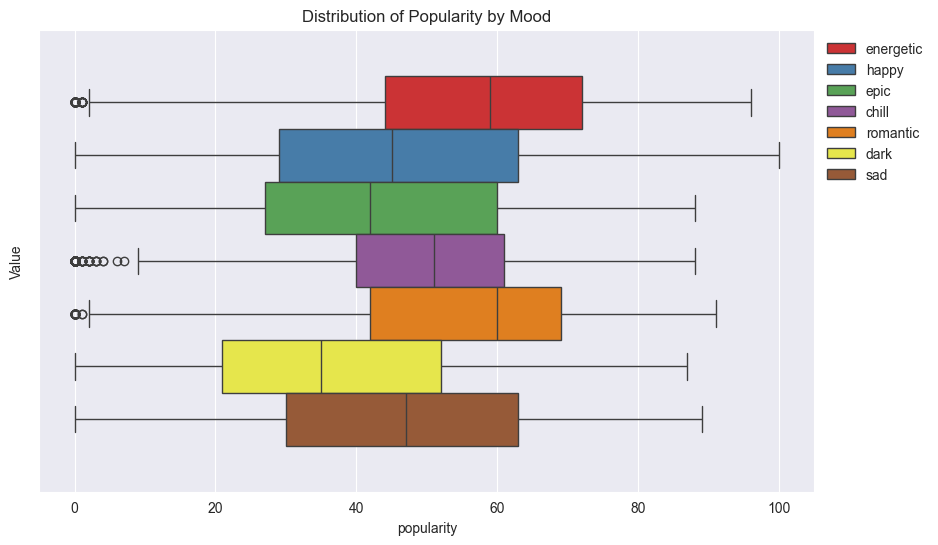

In [157]:
create_visualization(track_df, sns.boxplot, hue='mood', palette='Set1')

In [160]:
track_df.to_csv('/Users/bryanzhang/Desktop/career/projects/harmonic_horizons/data/cleaned_tracks.csv')